In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [9]:
np.random.seed(0)

In [10]:
n_pts=500
X, y= datasets.make_circles(n_samples=n_pts, random_state=123, factor=0.2, noise=0.1)

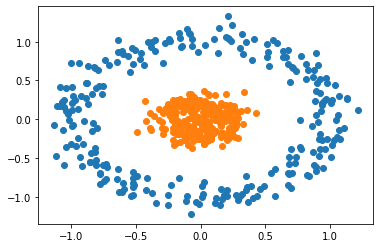

In [11]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [13]:
model =Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
adam=Adam(learning_rate=0.01)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=500,shuffle='true')

Epoch 1/500
25/25 [==============================] - 1s 1ms/step - loss: 0.6996 - accuracy: 0.5044
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6340
Epoch 3/500
25/25 [==============================] - 0s 971us/step - loss: 0.6937 - accuracy: 0.6606
Epoch 4/500
25/25 [==============================] - 0s 994us/step - loss: 0.6916 - accuracy: 0.4792
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5542
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5349
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5615
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.7454
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.7001
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5915
Epoch

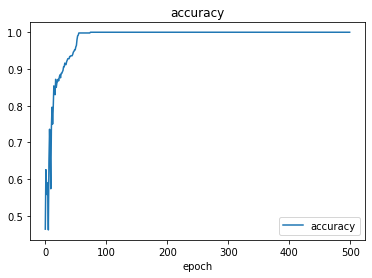

In [15]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

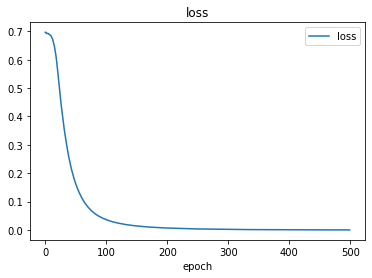

In [16]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [17]:
def plot_decision_boundary(X,y, model):
  x1_span=np.linspace(X[:,0].min(),X[:,0].max())
  x2_span=np.linspace(X[:,1].min(),X[:,1].max())
  xx, yy =np.meshgrid(x1_span,x2_span)
  xx_,yy_=xx.ravel(), yy.ravel()
  grid=np.c_[xx_,yy_]
  pred_func=model.predict(grid)
  z=pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

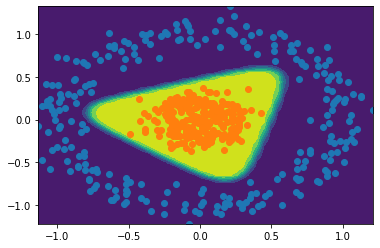

In [18]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

Prediction is  [[0.00021684]]


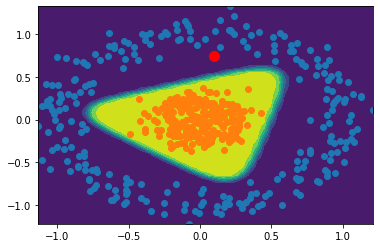

In [19]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
x=0.1
y=0.75
point=np.array([[x,y]])
pred=model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print("Prediction is ", pred)